# Marketing Analytics For E-Commerce Market Place Company


Import multiple necessary libraries

In [106]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

Read all the files

In [107]:
cust = pd.read_csv("C:/Users/user/Downloads/5. Python Foundation End to End Case Study_E-Commerce Analytics Project/CUSTOMERS.csv")
order = pd.read_csv("C:/Users/user/Downloads/5. Python Foundation End to End Case Study_E-Commerce Analytics Project/ORDERS.csv")
products = pd.read_csv("C:/Users/user/Downloads/5. Python Foundation End to End Case Study_E-Commerce Analytics Project/PRODUCTS.csv")
sellers = pd.read_csv("C:/Users/user/Downloads/5. Python Foundation End to End Case Study_E-Commerce Analytics Project/SELLERS.csv")
order_items = pd.read_csv("C:/Users/user/Downloads/5. Python Foundation End to End Case Study_E-Commerce Analytics Project/ORDER_ITEMS.csv")
order_payments = pd.read_csv("C:/Users/user/Downloads/5. Python Foundation End to End Case Study_E-Commerce Analytics Project/ORDER_PAYMENTS.csv")
order_review = pd.read_csv("C:/Users/user/Downloads/5. Python Foundation End to End Case Study_E-Commerce Analytics Project/ORDER_REVIEW_RATINGS.csv")
geo_location = pd.read_csv("C:/Users/user/Downloads/5. Python Foundation End to End Case Study_E-Commerce Analytics Project/GEO_LOCATION.csv")

Check all the csv files and do necessary format change

In [108]:
cust.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Adoni,Andhra Pradesh
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,Akkarampalle,Andhra Pradesh
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,Akkayapalle,Andhra Pradesh
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,Alwal,Andhra Pradesh


In [109]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [110]:
order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [111]:
order.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,10/2/2017 10:56,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,7/24/2018 20:41,7/26/2018 3:24,7/26/2018 14:31,8/7/2018 15:27,8/13/2018 0:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,8/8/2018 8:38,8/8/2018 8:55,8/8/2018 13:50,8/17/2018 18:06,9/4/2018 0:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,11/18/2017 19:28,11/18/2017 19:45,11/22/2017 13:39,12/2/2017 0:28,12/15/2017 0:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2/13/2018 21:18,2/13/2018 22:20,2/14/2018 19:46,2/16/2018 18:17,2/26/2018 0:00


In [112]:
order.order_purchase_timestamp = pd.to_datetime(order.order_purchase_timestamp, format= "%m/%d/%Y %H:%M")
order.order_approved_at = pd.to_datetime(order.order_approved_at, format= "%m/%d/%Y %H:%M")
order.order_delivered_carrier_date = pd.to_datetime(order.order_delivered_carrier_date, format= "%m/%d/%Y %H:%M")
order.order_delivered_customer_date = pd.to_datetime(order.order_delivered_customer_date, format= "%m/%d/%Y %H:%M")
order.order_estimated_delivery_date = pd.to_datetime(order.order_estimated_delivery_date, format= "%m/%d/%Y %H:%M")

In [113]:
order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [114]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32328 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [115]:
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,Alwal,Andhra Pradesh
1,d1b65fc7debc3361ea86b5f14c68d2e2,13023,Alwal,Andhra Pradesh
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,Badepalle,Andhra Pradesh
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,Akkarampalle,Andhra Pradesh
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,Koratla,Andhra Pradesh


In [116]:
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3038 non-null   object
 3   seller_state            3038 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [117]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [118]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,9/19/2017 9:45,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,5/3/2017 11:05,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,1/18/2018 14:48,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,8/15/2018 10:10,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2/13/2017 13:57,199.90,18.14


In [119]:
# Converting Shipping_date variable to datetime format from object type
order_items.shipping_limit_date = pd.to_datetime(order_items.shipping_limit_date, format = "%m/%d/%Y %H:%M")
order_items.shipping_limit_date

0        2017-09-19 09:45:00
1        2017-05-03 11:05:00
2        2018-01-18 14:48:00
3        2018-08-15 10:10:00
4        2017-02-13 13:57:00
                 ...        
112645   2018-05-02 04:11:00
112646   2018-07-20 04:31:00
112647   2017-10-30 17:14:00
112648   2017-08-21 00:04:00
112649   2018-06-12 17:10:00
Name: shipping_limit_date, Length: 112650, dtype: datetime64[ns]

In [120]:
#Renaming Order_item_id column to Quantity
order_items.rename(columns ={'order_item_id':'Quantity'}, inplace=True)

In [121]:
# Removing Duplicate records from Order_Items table
order_items = order_items.drop_duplicates(subset=['order_id','product_id', 'seller_id', 'shipping_limit_date'], keep='last',ignore_index = True)
order_items


,order_id,Quantity,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:00,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:00,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:00,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:00,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:00,199.90,18.14
...,...,...,...,...,...,...,...
102420,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:00,299.99,43.41
102421,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:00,350.00,36.53
102422,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:00,99.90,16.95
102423,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:00,55.99,8.72


In [122]:
# Adding Total Cost variable in Order_Items table
order_items['tot_cost'] = ((order_items.Quantity * order_items.price) + order_items.freight_value)
order_items

,order_id,Quantity,product_id,seller_id,shipping_limit_date,price,freight_value,tot_cost
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:00,58.90,13.29,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:00,239.90,19.93,259.83
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:00,199.00,17.87,216.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:00,12.99,12.79,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:00,199.90,18.14,218.04
...,...,...,...,...,...,...,...,...
102420,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:00,299.99,43.41,343.40
102421,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:00,350.00,36.53,386.53
102422,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:00,99.90,16.95,116.85
102423,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:00,55.99,8.72,64.71


In [123]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102425 entries, 0 to 102424
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             102425 non-null  object        
 1   Quantity             102425 non-null  int64         
 2   product_id           102425 non-null  object        
 3   seller_id            102425 non-null  object        
 4   shipping_limit_date  102425 non-null  datetime64[ns]
 5   price                102425 non-null  float64       
 6   freight_value        102425 non-null  float64       
 7   tot_cost             102425 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(3)
memory usage: 6.3+ MB


In [124]:
order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [125]:
order_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [126]:
order_review.head()

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,1/18/2018 0:00,1/18/2018 21:46
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,3/10/2018 0:00,3/11/2018 3:05
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,2/17/2018 0:00,2/18/2018 14:36
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,4/21/2017 0:00,4/21/2017 22:02
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,3/1/2018 0:00,3/2/2018 10:26


In [127]:
order_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   review_id                100000 non-null  object
 1   order_id                 100000 non-null  object
 2   review_score             100000 non-null  int64 
 3   review_creation_date     100000 non-null  object
 4   review_answer_timestamp  100000 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [128]:
# Converting Review_creation_date and review_answer_timestamp  variable to datetime format from object type
order_review.review_creation_date = pd.to_datetime(order_review.review_creation_date , format = "%m/%d/%Y %H:%M")
order_review.review_answer_timestamp = pd.to_datetime(order_review.review_answer_timestamp, format = "%m/%d/%Y %H:%M")

In [129]:
order_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   review_id                100000 non-null  object        
 1   order_id                 100000 non-null  object        
 2   review_score             100000 non-null  int64         
 3   review_creation_date     100000 non-null  datetime64[ns]
 4   review_answer_timestamp  100000 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(2)
memory usage: 3.8+ MB


In [130]:
geo_location.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,Akkarampalle,Andhra Pradesh
1,1046,-23.546081,-46.644820,Akkarampalle,Andhra Pradesh
2,1041,-23.544392,-46.639499,Akkarampalle,Andhra Pradesh
3,1035,-23.541578,-46.641607,Akkarampalle,Andhra Pradesh
4,1012,-23.547762,-46.635361,Akkarampalle,Andhra Pradesh


In [131]:
geo_location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19015 entries, 0 to 19014
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   geolocation_zip_code_prefix  19015 non-null  int64  
 1   geolocation_lat              19015 non-null  float64
 2   geolocation_lng              19015 non-null  float64
 3   geolocation_city             19015 non-null  object 
 4   geolocation_state            19015 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 742.9+ KB


In [132]:
# Combining Table Orders and Order_Items
ord_item_orders = pd.merge(left = order_items, right = order, how = 'left', on = 'order_id')
ord_item_orders

,order_id,Quantity,product_id,seller_id,shipping_limit_date,price,freight_value,tot_cost,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:00,58.90,13.29,72.19,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:00,2017-09-13 09:45:00,2017-09-19 18:34:00,2017-09-20 23:43:00,2017-09-29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:00,239.90,19.93,259.83,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:00,2017-04-26 11:05:00,2017-05-04 14:35:00,2017-05-12 16:04:00,2017-05-15
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:00,199.00,17.87,216.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:00,2018-01-14 14:48:00,2018-01-16 12:36:00,2018-01-22 13:19:00,2018-02-05
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:00,12.99,12.79,25.78,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:00,2018-08-08 10:10:00,2018-08-10 13:28:00,2018-08-14 13:32:00,2018-08-20
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:00,199.90,18.14,218.04,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:00,2017-02-04 14:10:00,2017-02-16 09:46:00,2017-03-01 16:42:00,2017-03-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102420,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:00,299.99,43.41,343.40,b51593916b4b8e0d6f66f2ae24f2673d,delivered,2018-04-23 13:57:00,2018-04-25 04:11:00,2018-04-25 12:09:00,2018-05-10 22:56:00,2018-05-18
102421,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:00,350.00,36.53,386.53,84c5d4fbaf120aae381fad077416eaa0,delivered,2018-07-14 10:26:00,2018-07-17 04:31:00,2018-07-17 08:05:00,2018-07-23 20:31:00,2018-08-01
102422,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:00,99.90,16.95,116.85,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:00,2017-10-24 17:14:00,2017-10-26 15:13:00,2017-10-28 12:22:00,2017-11-10
102423,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:00,55.99,8.72,64.71,b5e6afd5a41800fdf401e0272ca74655,delivered,2017-08-14 23:02:00,2017-08-15 00:04:00,2017-08-15 19:02:00,2017-08-16 21:59:00,2017-08-25


1.a)Define & calculate high level metrics like (Total Revenue, Total quantity, Total products, Total categories, Total sellers, Total locations, Total channels, Total payment methods etc…)

In [133]:
print('Total Revenue: ', round(order_items.price.sum(),2))
print('Total Quantity: ',order_items.Quantity.sum())
print('Total Products:',products.product_id.nunique())
print('Total customers: ', cust.customer_unique_id.nunique())
print('Total sellers :',sellers.seller_id.nunique())
print('Total location: ',geo_location.geolocation_zip_code_prefix.nunique())
print('Total product categores :',products.product_category_name.nunique())
print('Total payments: ',order_payments.payment_type.nunique())

Total Revenue:  12743924.0
Total Quantity:  117844
Total Products: 32951
Total customers:  96096
Total sellers : 3095
Total location:  19015
Total product categores : 71
Total payments:  5


1.b)Understanding how many new customers acquired every month

In [134]:
order['year_month'] = order.order_purchase_timestamp.dt.strftime("%Y-%m")
order.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,year_month
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:00,2017-10-02 11:07:00,2017-10-04 19:55:00,2017-10-10 21:25:00,2017-10-18,2017-10
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:00,2018-07-26 03:24:00,2018-07-26 14:31:00,2018-08-07 15:27:00,2018-08-13,2018-07
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:00,2018-08-08 08:55:00,2018-08-08 13:50:00,2018-08-17 18:06:00,2018-09-04,2018-08
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:00,2017-11-18 19:45:00,2017-11-22 13:39:00,2017-12-02 00:28:00,2017-12-15,2017-11
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:00,2018-02-13 22:20:00,2018-02-14 19:46:00,2018-02-16 18:17:00,2018-02-26,2018-02


In [135]:
#combing customer table and order table
order_cust = pd.merge(left = order, right = cust,how = "left", on = 'customer_id')
order_cust.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,year_month,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:00,2017-10-02 11:07:00,2017-10-04 19:55:00,2017-10-10 21:25:00,2017-10-18,2017-10,7c396fd4830fd04220f754e42b4e5bff,3149,Akkarampalle,Andhra Pradesh
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:00,2018-07-26 03:24:00,2018-07-26 14:31:00,2018-08-07 15:27:00,2018-08-13,2018-07,af07308b275d755c9edb36a90c618231,47813,Pandariya,Chhattisgarh
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:00,2018-08-08 08:55:00,2018-08-08 13:50:00,2018-08-17 18:06:00,2018-09-04,2018-08,3a653a41f6f9fc3d2a113cf8398680e8,75265,Dhamdha,Chhattisgarh
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:00,2017-11-18 19:45:00,2017-11-22 13:39:00,2017-12-02 00:28:00,2017-12-15,2017-11,7c142cf63193a1473d2e66489a9ae977,59296,Kartarpur,Punjab
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:00,2018-02-13 22:20:00,2018-02-14 19:46:00,2018-02-16 18:17:00,2018-02-26,2018-02,72632f0f9dd73dfee390c9b22eb56dd6,9195,Bheemavaram,Andhra Pradesh


In [136]:
cust_vs_month = order_cust[['customer_unique_id','year_month']]
cust_vs_month.head()

,customer_unique_id,year_month
0,7c396fd4830fd04220f754e42b4e5bff,2017-10
1,af07308b275d755c9edb36a90c618231,2018-07
2,3a653a41f6f9fc3d2a113cf8398680e8,2018-08
3,7c142cf63193a1473d2e66489a9ae977,2017-11
4,72632f0f9dd73dfee390c9b22eb56dd6,2018-02


In [137]:
cust_vs_month_new = cust_vs_month.drop_duplicates(subset = 'customer_unique_id', keep = 'first')
cust_vs_month_new

,customer_unique_id,year_month
0,7c396fd4830fd04220f754e42b4e5bff,2017-10
1,af07308b275d755c9edb36a90c618231,2018-07
2,3a653a41f6f9fc3d2a113cf8398680e8,2018-08
3,7c142cf63193a1473d2e66489a9ae977,2017-11
4,72632f0f9dd73dfee390c9b22eb56dd6,2018-02
...,...,...
99436,6359f309b166b0196dbf7ad2ac62bb5a,2017-03
99437,da62f9e57a76d978d02ab5362c509660,2018-02
99438,737520a9aad80b3fbbdad19b66b37b30,2017-08
99439,5097a5312c8b157bb7be58ae360ef43c,2018-01


In [138]:
#Summary Table 
cust_vs_month_new_summ = cust_vs_month.groupby('year_month')[['customer_unique_id']].count().reset_index()
cust_vs_month_new_summ.rename(columns = {'customer_unique_id': 'count'},inplace = True)
cust_vs_month_new_summ.head()

,year_month,count
0,2016-09,4
1,2016-10,324
2,2016-12,1
3,2017-01,800
4,2017-02,1780


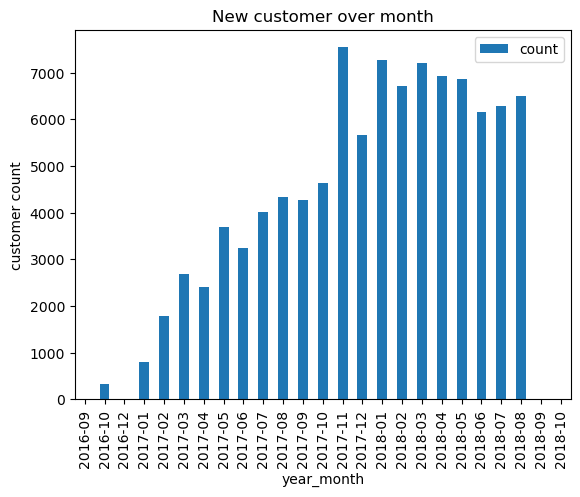

In [139]:
cust_vs_month_new_summ.plot(kind ='bar',x = 'year_month',y = 'count',title = "New customer over month")
plt.ylabel('customer count')
plt.show()

1.c. Understand the retention of customers on month on month basis

In [140]:
cust_vs_month.shape[0]

99441

In [141]:
cust_vs_month_new.shape[0]

96096

In [142]:
cust_month_retention = cust_vs_month[~cust_vs_month.isin(cust_vs_month_new).all(axis=1)]
cust_month_retention

,customer_unique_id,year_month
2374,7e30d2336a1f1182766cf6fb863d5554,2018-05
2829,c5400d2fca348bd1313426efe4b10a51,2018-04
3660,8d50f5eadf50201ccdcedfb9e2ac8455,2018-05
4058,a7f45c1961dbd98e7a14f3d38ea11c06,2018-07
4070,7a380cb5434e6b6b5b37d45bb99dbe8a,2018-05
...,...,...
99307,62b8761192c86f4ead06f4a433096a2b,2018-05
99344,dca9a13536adcef18c6c5859487347b1,2018-03
99347,d05c44a138277ad325d915c6b7ccbcdf,2018-09
99419,39fff7cb5873a7116b02234bd1e6c6dc,2017-10


In [143]:
#Summary Table 
cust_month_retention_summ = cust_month_retention.groupby('year_month')[['customer_unique_id']].count().reset_index()
cust_month_retention_summ.rename(columns = {'customer_unique_id': 'count'},inplace = True)
cust_month_retention_summ.head()

,year_month,count
0,2016-10,9
1,2017-01,58
2,2017-02,51
3,2017-03,83
4,2017-04,90


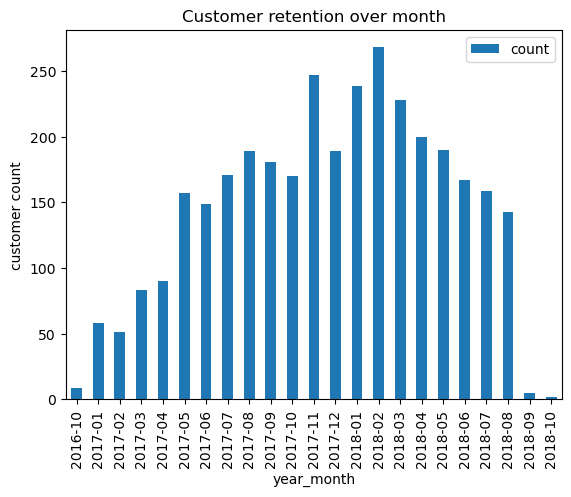

In [144]:
cust_month_retention_summ.plot(kind ='bar',x = 'year_month',y = 'count',title = "Customer retention over month")
plt.ylabel('customer count')
plt.show()

d. How the revenues from existing/new customers on month on month basis

In [145]:
order_item_month = pd.merge(left = order_items, right = order, how = 'left', on = 'order_id')
order_item_month.head()

,order_id,Quantity,product_id,seller_id,shipping_limit_date,price,freight_value,tot_cost,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,year_month
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:00,58.90,13.29,72.19,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:00,2017-09-13 09:45:00,2017-09-19 18:34:00,2017-09-20 23:43:00,2017-09-29,2017-09
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:00,239.90,19.93,259.83,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:00,2017-04-26 11:05:00,2017-05-04 14:35:00,2017-05-12 16:04:00,2017-05-15,2017-04
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:00,199.00,17.87,216.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:00,2018-01-14 14:48:00,2018-01-16 12:36:00,2018-01-22 13:19:00,2018-02-05,2018-01
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:00,12.99,12.79,25.78,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:00,2018-08-08 10:10:00,2018-08-10 13:28:00,2018-08-14 13:32:00,2018-08-20,2018-08
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:00,199.90,18.14,218.04,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:00,2017-02-04 14:10:00,2017-02-16 09:46:00,2017-03-01 16:42:00,2017-03-17,2017-02


In [146]:
order_item_month['net_price'] = order_item_month.price + order_item_month.freight_value


In [147]:
rev_month = order_item_month.groupby('year_month')[['net_price']].sum()
rev_month.head()

,net_price
year_month,
2016-09,259.11
2016-10,52857.48
2016-12,19.62
2017-01,125855.62
2017-02,270360.88


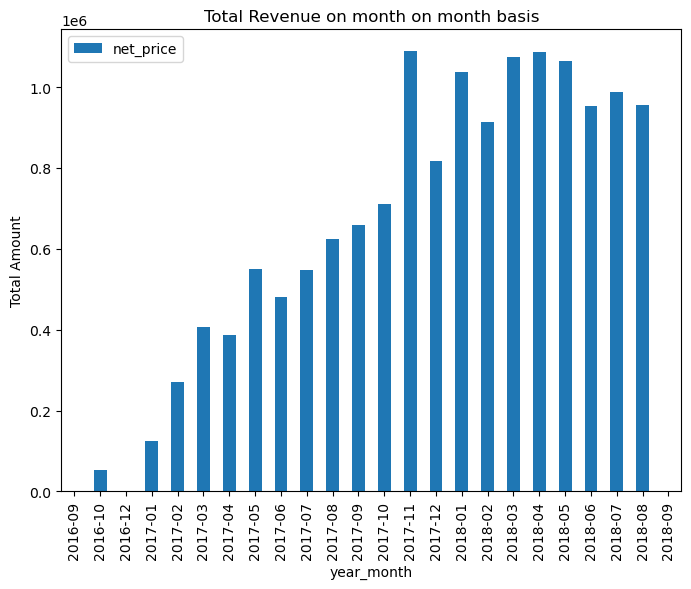

In [148]:
rev_month.plot(kind = 'bar', figsize=(8,6))
plt.ylabel('Total Amount')
plt.title('Total Revenue on month on month basis')
plt.show()

e. Understand the trends/seasonality of sales, quantity by category, location, month, week, day, time, channel, payment method etc…

In [149]:
ord_item_orders['Month'] = ord_item_orders.order_purchase_timestamp.apply(lambda x:pd.Timestamp.strftime(x, format = '%b'))
ord_item_orders.head()

,order_id,Quantity,product_id,seller_id,shipping_limit_date,price,freight_value,tot_cost,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,Month
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:00,58.90,13.29,72.19,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:00,2017-09-13 09:45:00,2017-09-19 18:34:00,2017-09-20 23:43:00,2017-09-29,Sep
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:00,239.90,19.93,259.83,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:00,2017-04-26 11:05:00,2017-05-04 14:35:00,2017-05-12 16:04:00,2017-05-15,Apr
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:00,199.00,17.87,216.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:00,2018-01-14 14:48:00,2018-01-16 12:36:00,2018-01-22 13:19:00,2018-02-05,Jan
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:00,12.99,12.79,25.78,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:00,2018-08-08 10:10:00,2018-08-10 13:28:00,2018-08-14 13:32:00,2018-08-20,Aug
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:00,199.90,18.14,218.04,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:00,2017-02-04 14:10:00,2017-02-16 09:46:00,2017-03-01 16:42:00,2017-03-17,Feb


In [150]:
ord_item_orders_prod = pd.merge(left = ord_item_orders, right = products , how = 'left', on ='product_id')
ord_item_orders_prod.head()

,order_id,Quantity,product_id,seller_id,shipping_limit_date,price,freight_value,tot_cost,customer_id,order_status,...,order_estimated_delivery_date,Month,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:00,58.90,13.29,72.19,3ce436f183e68e07877b285a838db11a,delivered,...,2017-09-29,Sep,Cool_Stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:00,239.90,19.93,259.83,f6dd3ec061db4e3987629fe6b26e5cce,delivered,...,2017-05-15,Apr,Pet_Shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:00,199.00,17.87,216.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,...,2018-02-05,Jan,Furniture_Decor,59.0,695.0,2.0,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:00,12.99,12.79,25.78,d4eb9395c8c0431ee92fce09860c5a06,delivered,...,2018-08-20,Aug,Perfumery,42.0,480.0,1.0,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:00,199.90,18.14,218.04,58dbd0b2d70206bf40e62cd34e84d795,delivered,...,2017-03-17,Feb,Garden_Tools,59.0,409.0,1.0,3750.0,35.0,40.0,30.0


In [151]:
#product category wise sales
ord_item_orders_prod.groupby('product_category_name')[['Quantity','tot_cost']].sum().reset_index().rename(columns={'product_category_name':'Product_category'})

,Product_category,Quantity,tot_cost
0,Agro_Industry_And_Commerce,216,78384.51
1,Air_Conditioning,299,61036.81
2,Art,213,28531.16
3,Arts_And_Craftmanship,26,2246.03
4,Audio,368,56573.82
...,...,...,...
66,Stationery,2616,282457.31
67,Tablets_Printing_Image,85,8895.90
68,Telephony,4667,394394.69
69,Toys,4269,572201.56


In [152]:
#monthly sales trend
ord_item_orders_prod.groupby('Month')[['Quantity','tot_cost']].sum().reset_index().rename(columns={'tot_cost':'Sales'})

,Month,Quantity,Sales
0,Apr,11168,1595225.10
1,Aug,12802,1707337.97
2,Dec,6578,873415.01
3,Feb,9938,1280715.00
4,Jan,9603,1265705.89
5,Jul,12165,1666881.02
6,Jun,11126,1546972.08
7,Mar,11640,1598458.95
8,May,12597,1761992.52
9,Nov,9152,1203947.83


In [153]:
#Adding Week Number in Table
ord_item_orders_prod['Week_Num'] = ord_item_orders_prod['order_purchase_timestamp'].dt.isocalendar().week
ord_item_orders_prod.head()

,order_id,Quantity,product_id,seller_id,shipping_limit_date,price,freight_value,tot_cost,customer_id,order_status,...,Month,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,Week_Num
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:00,58.90,13.29,72.19,3ce436f183e68e07877b285a838db11a,delivered,...,Sep,Cool_Stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,37
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:00,239.90,19.93,259.83,f6dd3ec061db4e3987629fe6b26e5cce,delivered,...,Apr,Pet_Shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,17
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:00,199.00,17.87,216.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,...,Jan,Furniture_Decor,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,2
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:00,12.99,12.79,25.78,d4eb9395c8c0431ee92fce09860c5a06,delivered,...,Aug,Perfumery,42.0,480.0,1.0,200.0,16.0,10.0,15.0,32
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:00,199.90,18.14,218.04,58dbd0b2d70206bf40e62cd34e84d795,delivered,...,Feb,Garden_Tools,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,5


In [154]:
#weekly sales trend
ord_item_orders_prod.groupby('Week_Num')[['Quantity','tot_cost']].sum().reset_index().rename(columns = {'tot_cost':'Sales'})

,Week_Num,Quantity,Sales
0,1,1689,222465.61
1,2,2172,295283.44
2,3,2283,291854.78
3,4,2352,319659.00
4,5,2472,319828.80
5,6,2422,330436.00
6,7,2415,292971.69
7,8,2518,305029.81
8,9,2793,386203.44
9,10,2611,361025.20


In [155]:
ord_item_orders_cust = pd.merge(left= ord_item_orders, right= cust,how ='left',on ='customer_id')
ord_item_orders_cust.head()

,order_id,Quantity,product_id,seller_id,shipping_limit_date,price,freight_value,tot_cost,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,Month,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:00,58.90,13.29,72.19,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:00,2017-09-13 09:45:00,2017-09-19 18:34:00,2017-09-20 23:43:00,2017-09-29,Sep,871766c5855e863f6eccc05f988b23cb,28013,Guntakal,Andhra Pradesh
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:00,239.90,19.93,259.83,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:00,2017-04-26 11:05:00,2017-05-04 14:35:00,2017-05-12 16:04:00,2017-05-15,Apr,eb28e67c4c0b83846050ddfb8a35d051,15775,Kirandul,Chhattisgarh
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:00,199.00,17.87,216.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:00,2018-01-14 14:48:00,2018-01-16 12:36:00,2018-01-22 13:19:00,2018-02-05,Jan,3818d81c6709e39d06b2738a8d3a2474,35661,Kanker,Chhattisgarh
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:00,12.99,12.79,25.78,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:00,2018-08-08 10:10:00,2018-08-10 13:28:00,2018-08-14 13:32:00,2018-08-20,Aug,af861d436cfc08b2c2ddefd0ba074622,12952,Patancheru,Andhra Pradesh
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:00,199.90,18.14,218.04,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:00,2017-02-04 14:10:00,2017-02-16 09:46:00,2017-03-01 16:42:00,2017-03-17,Feb,64b576fb70d441e8f1b2d7d446e483c5,13226,Changanassery,Kerala


In [156]:
#location wise sales
ord_item_orders_cust.groupby('customer_zip_code_prefix')[['Quantity','tot_cost']].sum().reset_index().rename(columns={'tot_cost':'Sales'})

,customer_zip_code_prefix,Quantity,Sales
0,1003,1,98.97
1,1004,2,198.11
2,1005,6,570.72
3,1006,2,868.05
4,1007,4,505.55
...,...,...,...
14971,99960,1,141.63
14972,99965,2,227.59
14973,99970,1,252.74
14974,99980,4,271.76


In [157]:
# Most Popular Products by Category
ord_item_orders_prod.groupby(['product_category_name','product_id'])['Quantity'].sum().reset_index().sort_values(by = 'Quantity', ascending = False).drop_duplicates(subset = 'product_category_name', keep = 'first')

,product_category_name,product_id,Quantity
14154,Furniture_Decor,aca2eb7d00ea1a7b8ebd4e68314663af,529
5002,Bed_Bath_Table,99a4788cb24856965c36a24e339b6058,519
15387,Garden_Tools,422879e10f46682990de24d770e7f83d,511
7999,Computers_Accessories,d1c427060a0f73f6b889a5c7c61f2ac4,348
31448,Watches_Gifts,53b36df67ebb7c41585e8d54d6772e08,328
...,...,...,...
267,Arts_And_Craftmanship,b9976e9c22fb1540bd71d1bcd2989475,5
22144,Music,4befae07dba4384f6d8237ad1e7f8294,4
21673,La_Cuisine,33900d427fa4bd3f509cdacda72e84a3,3
11650,Fashion_Childrens_Clothes,57bdf3098169cccdb62221bd3e089cbd,3


In [158]:
# Most Popular Products by State
ord_item_orders_cust.groupby(['customer_state','product_id'])['Quantity'].sum().reset_index().sort_values(by = 'Quantity', ascending = False).drop_duplicates(subset = 'customer_state', keep = 'first')

,customer_state,product_id,Quantity
16353,Andhra Pradesh,aca2eb7d00ea1a7b8ebd4e68314663af,347
34289,Gujarat,53759a2ecddad2bb87a079a1f1519f73,52
26503,Chhattisgarh,422879e10f46682990de24d770e7f83d,41
43557,Karnataka,99a4788cb24856965c36a24e339b6058,24
30616,Delhi,422879e10f46682990de24d770e7f83d,22
47486,Madhya Pradesh,99a4788cb24856965c36a24e339b6058,18
49461,Maharashtra,99a4788cb24856965c36a24e339b6058,15
41114,Jammu & Kashmir,89b190a046022486c635022524a974a8,15
52665,Tamil Nadu,53759a2ecddad2bb87a079a1f1519f73,13
38162,Haryana,2b4609f8948be18874494203496bc318,13


In [159]:
# Most Popular Product by Seller
ord_item_orders_cust.groupby(['seller_id','product_id'])[['Quantity']].sum().reset_index().sort_values(by = 'Quantity', ascending = False).drop_duplicates(subset = 'seller_id', keep = 'first')

,seller_id,product_id,Quantity
21025,955fee9216a65b617aa5c0531780ce60,aca2eb7d00ea1a7b8ebd4e68314663af,529
9881,4a3ca9315b744ce9f8e9374361493884,99a4788cb24856965c36a24e339b6058,513
4645,1f50f920176fa81dab994f9023523100,422879e10f46682990de24d770e7f83d,511
22211,a1043bafd471dff536d0c462352beb48,d1c427060a0f73f6b889a5c7c61f2ac4,348
26771,cc419e0650a3c5ba77189a1882b7556a,154e7e31ebfa092203795c972e5804a6,283
...,...,...,...
15411,713e3a23ca5e47786eb6f0d99f94cfac,3fcd8dfe610c62edfb51de2630cd9ef4,1
15396,712efd3b68f9686dc856b84abd0f21ae,4466f429e81266e99d1935267aa13329,1
15019,702835e4b785b67a084280efca355756,a9c404971d1a5b1cbc2e4070e02731fd,1
15275,70ee69419916dc13e3aed619061f996c,dedb5adefe63796ce6edd624d0ebd8a8,1


In [160]:
# Most Popular Product by Month
ord_item_orders_cust.groupby(['Month','product_id'])[['Quantity']].sum().reset_index().sort_values(by = 'Quantity', ascending = False).drop_duplicates(subset = 'Month', keep = 'first')

,Month,product_id,Quantity
24273,Jan,aca2eb7d00ea1a7b8ebd4e68314663af,122
46058,May,53b36df67ebb7c41585e8d54d6772e08,114
51336,Nov,422879e10f46682990de24d770e7f83d,98
1887,Apr,53b36df67ebb7c41585e8d54d6772e08,87
35893,Jun,99a4788cb24856965c36a24e339b6058,79
20624,Feb,e53e557d5a159f5aa2c5e995dfdf244b,78
29727,Jul,99a4788cb24856965c36a24e339b6058,74
12169,Aug,e7cc48a9daff5436f63d3aad9426f28b,68
42079,Mar,aca2eb7d00ea1a7b8ebd4e68314663af,65
13708,Dec,422879e10f46682990de24d770e7f83d,53


g. Popular categories by state, month

In [164]:
#most popular category by month
ord_item_orders_prod.groupby(['Month','product_category_name'])[['Quantity']].sum().reset_index().sort_values(by = 'Quantity',ascending = False).drop_duplicates(subset = 'Month',keep = 'first')

,Month,product_category_name,Quantity
339,Jul,Bed_Bath_Table,1337
76,Aug,Bed_Bath_Table,1292
407,Jun,Bed_Bath_Table,1271
541,May,Bed_Bath_Table,1217
473,Mar,Bed_Bath_Table,1196
213,Feb,Computers_Accessories,1146
7,Apr,Bed_Bath_Table,1141
608,Nov,Bed_Bath_Table,1096
270,Jan,Bed_Bath_Table,1023
673,Oct,Bed_Bath_Table,667


In [163]:
# Most Popular Category by State
ord_item_orders_cust_prod = pd.merge(ord_item_orders_cust, products, how = 'left', on = 'product_id')
ord_item_orders_cust_prod.groupby(['customer_state','product_category_name'])[['Quantity']].sum().reset_index().sort_values(by = 'Quantity', ascending = False) \
                        .drop_duplicates(subset = 'customer_state', keep = 'first')

,customer_state,product_category_name,Quantity
7,Andhra Pradesh,Bed_Bath_Table,7911
272,Gujarat,Bed_Bath_Table,869
132,Chhattisgarh,Bed_Bath_Table,729
505,Karnataka,Bed_Bath_Table,420
625,Madhya Pradesh,Bed_Bath_Table,364
229,Delhi,Health_Beauty,337
339,Haryana,Bed_Bath_Table,315
691,Maharashtra,Bed_Bath_Table,240
901,Tamil Nadu,Bed_Bath_Table,233
448,Jammu & Kashmir,Bed_Bath_Table,193


h. List top 10 most expensive products sorted by price

In [165]:
order_items.groupby('product_id')['price'].mean().reset_index().sort_values(by = 'price',ascending = False,ignore_index = True).head(10)


,product_id,price
0,489ae2aa008f021502940f251d4cce7f,6735.00
1,69c590f7ffc7bf8db97190b6cb6ed62e,6729.00
2,1bdf5e6731585cf01aa8169c7028d6ad,6499.00
3,a6492cc69376c469ab6f61d8f44de961,4799.00
4,c3ed642d592594bb648ff4a04cee2747,4690.00
5,259037a6a41845e455183f89c5035f18,4590.00
6,a1beef8f3992dbd4cd8726796aa69c53,4399.87
7,6cdf8fc1d741c76586d8b6b15e9eef30,4099.99
8,6902c1962dd19d540807d0ab8fade5c6,3999.90
9,4ca7b91a31637bd24fb8e559d5e015e4,3999.00


2. Performing Customers/sellers Segmentation

a. Divide the customers into groups based on the revenue generated

In [166]:
#creating decile grp for customer
cust_grp = ord_item_orders_cust.groupby('customer_id')[['tot_cost']].sum().reset_index().rename(columns={'tot_cost':'Revenue'})
cust_grp

,customer_id,Revenue
0,00012a2ce6f8dcda20d059ce98491703,114.74
1,000161a058600d5901f007fab4c27140,67.41
2,0001fd6190edaaf884bcaf3d49edf079,195.42
3,0002414f95344307404f0ace7a26f1d5,179.35
4,000379cdec625522490c315e70c7a9fb,107.01
...,...,...
98661,fffcb937e9dd47a13f05ecb8290f4d3e,91.91
98662,fffecc9f79fd8c764f843e9951b11341,81.36
98663,fffeda5b6d849fbd39689bb92087f431,63.13
98664,ffff42319e9b2d713724ae527742af25,214.13


In [167]:
cust_grp['decile_grp'] = pd.cut(cust_grp.Revenue,bins=10,labels= np.arange(1,11))
cust_grp

,customer_id,Revenue,decile_grp
0,00012a2ce6f8dcda20d059ce98491703,114.74,1
1,000161a058600d5901f007fab4c27140,67.41,1
2,0001fd6190edaaf884bcaf3d49edf079,195.42,1
3,0002414f95344307404f0ace7a26f1d5,179.35,1
4,000379cdec625522490c315e70c7a9fb,107.01,1
...,...,...,...
98661,fffcb937e9dd47a13f05ecb8290f4d3e,91.91,1
98662,fffecc9f79fd8c764f843e9951b11341,81.36,1
98663,fffeda5b6d849fbd39689bb92087f431,63.13,1
98664,ffff42319e9b2d713724ae527742af25,214.13,1


b. Divide the sellers into groups based on the revenue generated 

In [168]:
#creating decile grp for sellers
seller_grp = ord_item_orders_cust.groupby('seller_id')[['tot_cost']].sum().reset_index().rename(columns={'tot_cost':'Revenue'})
seller_grp

,seller_id,Revenue
0,0015a82c2db000af6aaaf3ae2ecb0532,2748.06
1,001cca7ae9ae17fb1caed9dfb1094831,32871.94
2,001e6ad469a905060d959994f1b41e4f,267.94
3,002100f778ceb8431b7a1020ff7ab48f,2111.66
4,003554e2dce176b5555353e4f3555ac8,139.38
...,...,...
3090,ffcfefa19b08742c5d315f2791395ee5,79.52
3091,ffdd9f82b9a447f6f8d4b91554cc7dd3,2716.83
3092,ffeee66ac5d5a62fe688b9d26f83f534,2259.55
3093,fffd5413c0700ac820c7069d66d98c89,12117.32


In [169]:
seller_grp['decile_grp'] = pd.cut(seller_grp.Revenue , bins=10, labels = np.arange(1,11))
seller_grp

,seller_id,Revenue,decile_grp
0,0015a82c2db000af6aaaf3ae2ecb0532,2748.06,1
1,001cca7ae9ae17fb1caed9dfb1094831,32871.94,2
2,001e6ad469a905060d959994f1b41e4f,267.94,1
3,002100f778ceb8431b7a1020ff7ab48f,2111.66,1
4,003554e2dce176b5555353e4f3555ac8,139.38,1
...,...,...,...
3090,ffcfefa19b08742c5d315f2791395ee5,79.52,1
3091,ffdd9f82b9a447f6f8d4b91554cc7dd3,2716.83,1
3092,ffeee66ac5d5a62fe688b9d26f83f534,2259.55,1
3093,fffd5413c0700ac820c7069d66d98c89,12117.32,1


3. Cross-Selling (Which products are selling together)

In [170]:
# Cross Selling in terms of same Order_ID and at Same time
cross_sell = ord_item_orders.loc[: , ['order_id','order_purchase_timestamp','product_id']]
cross_sell = cross_sell[cross_sell.duplicated(subset = ['order_id','order_purchase_timestamp'], keep = False)]
cross_sell

,order_id,order_purchase_timestamp,product_id
73,002f98c0f7efd42638ed6100ca699b42,2017-08-04 09:19:00,d41dc2f2979f52d75d78714b378d4068
74,002f98c0f7efd42638ed6100ca699b42,2017-08-04 09:19:00,880be32f4db1d9f6e2bec38fb6ac23ab
83,00337fe25a3780b3424d9ad7c5a4b35e,2017-09-25 17:39:00,1f9799a175f50c9fa725984775cac5c5
84,00337fe25a3780b3424d9ad7c5a4b35e,2017-09-25 17:39:00,13944d17b257432717fd260e69853140
136,005d9a5423d47281ac463a968b3936fb,2017-10-18 12:14:00,fb7a100ec8c7b34f60cec22b1a9a10e0
...,...,...,...
102321,ffb9a9cd00c74c11c24aa30b3d78e03b,2017-03-11 17:20:00,3321ad579f19476d0d668f726f8dffec
102332,ffc16cecff8dc037f60458f28d1c1ba5,2017-11-21 19:25:00,241e398aacc909372622952b2ec6f954
102333,ffc16cecff8dc037f60458f28d1c1ba5,2017-11-21 19:25:00,7c1043bb5837db0c6bc1953419a18628
102354,ffd543c2b60842e148a86870dc60e212,2018-01-04 12:00:00,3ce943997ff85cad84ec6770b35d6bcd


In [171]:
cross_sell_1 = cross_sell.drop_duplicates(subset=['order_id','order_purchase_timestamp'], keep='first', ignore_index=True)
cross_sell_1

,order_id,order_purchase_timestamp,product_id
0,002f98c0f7efd42638ed6100ca699b42,2017-08-04 09:19:00,d41dc2f2979f52d75d78714b378d4068
1,00337fe25a3780b3424d9ad7c5a4b35e,2017-09-25 17:39:00,1f9799a175f50c9fa725984775cac5c5
2,005d9a5423d47281ac463a968b3936fb,2017-10-18 12:14:00,fb7a100ec8c7b34f60cec22b1a9a10e0
3,00946f674d880be1f188abc10ad7cf46,2017-12-09 19:11:00,4dcb49b9ca7e48d2f108d40caa77caa2
4,0097f0545a302aafa32782f1734ff71c,2018-03-05 18:15:00,b6397895a17ce86decd60b898b459796
...,...,...,...
3231,ffb18bf111fa70edf316eb0390427986,2017-11-27 13:29:00,e86b81dcac341ea01df0260077cdf082
3232,ffb8f7de8940249a3221252818937ecb,2018-07-22 12:58:00,bd6e8cf9fe4122c385da2bcb9f979d5d
3233,ffb9a9cd00c74c11c24aa30b3d78e03b,2017-03-11 17:20:00,fec565c4e3ad965c73fb1a21bb809257
3234,ffc16cecff8dc037f60458f28d1c1ba5,2017-11-21 19:25:00,241e398aacc909372622952b2ec6f954


In [172]:
cross_sell_2 = cross_sell.drop_duplicates(subset=['order_id','order_purchase_timestamp'], keep='last', ignore_index=True)
cross_sell_2

,order_id,order_purchase_timestamp,product_id
0,002f98c0f7efd42638ed6100ca699b42,2017-08-04 09:19:00,880be32f4db1d9f6e2bec38fb6ac23ab
1,00337fe25a3780b3424d9ad7c5a4b35e,2017-09-25 17:39:00,13944d17b257432717fd260e69853140
2,005d9a5423d47281ac463a968b3936fb,2017-10-18 12:14:00,4c3ae5db49258df0784827bdacf3b396
3,00946f674d880be1f188abc10ad7cf46,2017-12-09 19:11:00,9bb2d066e4b33b624cbdfec7d50b3dcb
4,0097f0545a302aafa32782f1734ff71c,2018-03-05 18:15:00,636598095d69a5718e67d2c9a3c7dde6
...,...,...,...
3231,ffb18bf111fa70edf316eb0390427986,2017-11-27 13:29:00,599dc392f7a23273471b068d72408224
3232,ffb8f7de8940249a3221252818937ecb,2018-07-22 12:58:00,bd0ac51dc93e62c4dbe6ca9d70a9b311
3233,ffb9a9cd00c74c11c24aa30b3d78e03b,2017-03-11 17:20:00,3321ad579f19476d0d668f726f8dffec
3234,ffc16cecff8dc037f60458f28d1c1ba5,2017-11-21 19:25:00,7c1043bb5837db0c6bc1953419a18628


In [173]:
# Cross selling of 2 Products
cross_sell_final = pd.merge(cross_sell_1, cross_sell_2, on = ['order_id','order_purchase_timestamp'], how = 'inner')
cross_sell_final

,order_id,order_purchase_timestamp,product_id_x,product_id_y
0,002f98c0f7efd42638ed6100ca699b42,2017-08-04 09:19:00,d41dc2f2979f52d75d78714b378d4068,880be32f4db1d9f6e2bec38fb6ac23ab
1,00337fe25a3780b3424d9ad7c5a4b35e,2017-09-25 17:39:00,1f9799a175f50c9fa725984775cac5c5,13944d17b257432717fd260e69853140
2,005d9a5423d47281ac463a968b3936fb,2017-10-18 12:14:00,fb7a100ec8c7b34f60cec22b1a9a10e0,4c3ae5db49258df0784827bdacf3b396
3,00946f674d880be1f188abc10ad7cf46,2017-12-09 19:11:00,4dcb49b9ca7e48d2f108d40caa77caa2,9bb2d066e4b33b624cbdfec7d50b3dcb
4,0097f0545a302aafa32782f1734ff71c,2018-03-05 18:15:00,b6397895a17ce86decd60b898b459796,636598095d69a5718e67d2c9a3c7dde6
...,...,...,...,...
3231,ffb18bf111fa70edf316eb0390427986,2017-11-27 13:29:00,e86b81dcac341ea01df0260077cdf082,599dc392f7a23273471b068d72408224
3232,ffb8f7de8940249a3221252818937ecb,2018-07-22 12:58:00,bd6e8cf9fe4122c385da2bcb9f979d5d,bd0ac51dc93e62c4dbe6ca9d70a9b311
3233,ffb9a9cd00c74c11c24aa30b3d78e03b,2017-03-11 17:20:00,fec565c4e3ad965c73fb1a21bb809257,3321ad579f19476d0d668f726f8dffec
3234,ffc16cecff8dc037f60458f28d1c1ba5,2017-11-21 19:25:00,241e398aacc909372622952b2ec6f954,7c1043bb5837db0c6bc1953419a18628


4.a) How customers are paying?

In [174]:
payment =  order_payments.drop_duplicates(subset = 'payment_type',keep= 'first',ignore_index = True)['payment_type'].reset_index().drop(columns= 'index')
payment

,payment_type
0,credit_card
1,UPI
2,voucher
3,debit_card
4,not_defined


4.b) Which payment channels are used by most customers?

In [175]:
order_payments

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,UPI,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


In [176]:
payment_channel = order_payments.groupby('payment_type')[['payment_type']].count().rename(columns={'payment_type':'No_of_transaction'}).sort_values(by = 'No_of_transaction',ascending = False).reset_index()
payment_channel

,payment_type,No_of_transaction
0,credit_card,76795
1,UPI,19784
2,voucher,5775
3,debit_card,1529
4,not_defined,3


5. Customer satisfaction towards category & product

a. Which categories (top 10) are maximum rated & minimum rated?

In [177]:
order_items_prod = pd.merge(order_items , products, how = 'left',on = 'product_id')
order_review_cat= pd.merge(order_review, order_items_prod, how = 'left', on = 'order_id')
order_items_prod.head()

,order_id,Quantity,product_id,seller_id,shipping_limit_date,price,freight_value,tot_cost,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:00,58.90,13.29,72.19,Cool_Stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:00,239.90,19.93,259.83,Pet_Shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:00,199.00,17.87,216.87,Furniture_Decor,59.0,695.0,2.0,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:00,12.99,12.79,25.78,Perfumery,42.0,480.0,1.0,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:00,199.90,18.14,218.04,Garden_Tools,59.0,409.0,1.0,3750.0,35.0,40.0,30.0


In [178]:
order_review_cat.head()

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp,Quantity,product_id,seller_id,shipping_limit_date,price,freight_value,tot_cost,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,2018-01-18,2018-01-18 21:46:00,2.0,fd25ab760bfbba13c198fa3b4f1a0cd3,6d803cb79cc31c41c4c789a75933b3c7,2018-01-18 15:47:00,185.00,13.63,383.63,Sports_Leisure,42.0,858.0,1.0,1300.0,30.0,30.0,35.0
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,2018-03-10,2018-03-11 03:05:00,1.0,be0dbdc3d67d55727a65d4cd696ca73c,8e6d7754bc7e0f22c96d255ebda59eba,2018-03-06 12:48:00,79.79,8.30,88.09,Computers_Accessories,47.0,493.0,1.0,245.0,19.0,14.0,14.0
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,2018-02-17,2018-02-18 14:36:00,1.0,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-02-08 10:31:00,149.00,45.12,194.12,Computers_Accessories,59.0,1893.0,1.0,6550.0,20.0,20.0,20.0
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,2017-04-21,2017-04-21 22:02:00,1.0,52c80cedd4e90108bf4fa6a206ef6b03,a1043bafd471dff536d0c462352beb48,2017-04-13 17:55:00,179.99,42.85,222.84,Garden_Tools,33.0,2188.0,2.0,7650.0,20.0,20.0,20.0
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,2018-03-01,2018-03-02 10:26:00,1.0,3880d25d502b15b1de6fddc42ad1d67a,989becdce12ebc39863c2bceab6f3ca1,2018-02-15 15:48:00,1199.00,134.25,1333.25,Sports_Leisure,48.0,562.0,5.0,9850.0,105.0,35.0,50.0


In [180]:
cat_rev = order_review_cat.groupby('product_category_name')[['review_score']].mean().reset_index().sort_values(by = 'review_score')
print("Product Categories with Minimum Avg Rating")
cat_rev.head(10)

Product Categories with Minimum Avg Rating


,product_category_name,review_score
61,Security_And_Services,2.500000
57,Office_Furniture,3.587156
30,Fashion_Male_Clothing,3.617886
46,Home_Comfort_2,3.708333
27,Fashio_Female_Clothing,3.714286
23,Diapers_And_Hygiene,3.740741
4,Audio,3.811966
41,Furniture_Mattress_And_Upholstery,3.815789
19,Construction_Tools_Safety,3.846154
47,Home_Confort,3.848411


In [181]:
print("Product Categories with Maximum Avg Rating")
cat_rev.sort_values(by = 'review_score',ascending = False).head(10)

Product Categories with Maximum Avg Rating


,product_category_name,review_score
11,Cds_Dvds_Musicals,4.666667
29,Fashion_Childrens_Clothes,4.500000
8,Books_General_Interest,4.439623
9,Books_Imported,4.389831
37,Food_Drink,4.381356
22,Costruction_Tools_Tools,4.371134
10,Books_Technical,4.345865
53,Luggage_Accessories,4.327307
64,Small_Appliances_Home_Oven_And_Coffee,4.302632
32,Fashion_Sport,4.285714


b. Which products (top10) are maximum rated & minimum rated?

In [183]:
print('Minimum Rated 10 products')
order_review_cat.groupby('product_id')[['review_score']].mean().reset_index().sort_values(by= 'review_score').head(10)

Minimum Rated 10 products


,product_id,review_score
11572,592cc6634d2c783d297effc0b828bc37,1.0
16391,7e99ab6d9d5d63b0190513103bdc1188,1.0
16392,7e9b52ab8c9b4c0fa93e431e8c3975e4,1.0
24109,bb72e3bc2b09ab0edf7fc724639afafd,1.0
7124,36eabbbffe429d2997d5bf9b40695335,1.0
7121,36e89a9ec56f96288ea7fbb266132288,1.0
29952,e8bb3d53d12c06cae6287143be1ce7ec,1.0
31900,f7d5edd55cc83003c9ff58de184833d5,1.0
16405,7eb9c68704af5effea1cee6f3a6b4b4b,1.0
7111,36d2ea35ee407975d70fcef78e16e3a8,1.0


In [184]:
print('Maximum Rated 10 products')
order_review_cat.groupby('product_id')['review_score'].mean().reset_index().sort_values(by = 'review_score', ascending = False).head(10)

Maximum Rated 10 products


,product_id,review_score
0,00066f42aeeb9f3007548bb9d3f33c38,5.0
17330,86743ff92eee3d16b7df59cddd583b8c,5.0
17345,868ceb027ab706a4dee42e2220006b85,5.0
17343,868969d3a93aeeab7bfcd4fc3d3d65de,5.0
17342,868766ed2172644fdd977d6bd395a107,5.0
17340,8684bd8f93b4f4038d07188a23811e93,5.0
17335,867c96d2bb67aba6500a4c509cf76072,5.0
17334,867b820367ec206b38a357f2c12454b7,5.0
17333,867901d7e8488fb97f1fb538c09d476e,5.0
17325,865bfa00c1dad8f4146d3c2765f051ca,5.0


c. Average rating by location, seller, product, category, month etc.

In [186]:
#Average rating by product
order_review_cat.groupby('product_id')[['review_score']].mean().reset_index()

,product_id,review_score
0,00066f42aeeb9f3007548bb9d3f33c38,5.0
1,00088930e925c41fd95ebfe695fd2655,4.0
2,0009406fd7479715e4bef61dd91f2462,1.0
3,000b8f95fcb9e0096488278317764d19,5.0
4,000d9be29b5207b54e86aa1b1ac54872,5.0
...,...,...
32946,fff6177642830a9a94a0f2cba5e476d1,4.5
32947,fff81cc3158d2725c0655ab9ba0f712c,4.0
32948,fff9553ac224cec9d15d49f5a263411f,5.0
32949,fffdb2d0ec8d6a61f0a0a0db3f25b441,5.0


In [187]:
#Average rating by Month
order_review_cat['Month']= order_review_cat.review_creation_date.dt.strftime("%b")
order_review_cat.groupby('Month')[['review_score']].mean().reset_index()

,Month,review_score
0,Apr,3.900952
1,Aug,4.175617
2,Dec,3.868901
3,Feb,4.017187
4,Jan,4.022565
5,Jul,4.204557
6,Jun,4.139799
7,Mar,3.762186
8,May,4.126285
9,Nov,4.045171


In [189]:
#Average Rating by seller
order_review_cat.groupby('seller_id')[['review_score']].mean().reset_index()

,seller_id,review_score
0,0015a82c2db000af6aaaf3ae2ecb0532,3.666667
1,001cca7ae9ae17fb1caed9dfb1094831,3.935323
2,001e6ad469a905060d959994f1b41e4f,1.000000
3,002100f778ceb8431b7a1020ff7ab48f,3.982143
4,003554e2dce176b5555353e4f3555ac8,5.000000
...,...,...
3090,ffcfefa19b08742c5d315f2791395ee5,1.000000
3091,ffdd9f82b9a447f6f8d4b91554cc7dd3,4.333333
3092,ffeee66ac5d5a62fe688b9d26f83f534,4.214286
3093,fffd5413c0700ac820c7069d66d98c89,3.866667


In [194]:
#Average Rating by location
ord_items_orders_review = pd.merge(order_items, order_review, how = 'left', on= 'order_id')
ord_items_orders_review
odr_cust = pd.merge(order, cust, how = 'left', on= 'customer_id')
odr_cust
ord_items_orders_review_cust = pd.merge(left = ord_items_orders_review , right = odr_cust, how = 'left', on ='order_id')
ord_items_orders_review_cust

,order_id,Quantity,product_id,seller_id,shipping_limit_date,price,freight_value,tot_cost,review_id,review_score,...,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,year_month,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:00,58.90,13.29,72.19,97ca439bc427b48bc1cd7177abe71365,5,...,2017-09-13 08:59:00,2017-09-13 09:45:00,2017-09-19 18:34:00,2017-09-20 23:43:00,2017-09-29,2017-09,871766c5855e863f6eccc05f988b23cb,28013,Guntakal,Andhra Pradesh
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:00,239.90,19.93,259.83,7b07bacd811c4117b742569b04ce3580,4,...,2017-04-26 10:53:00,2017-04-26 11:05:00,2017-05-04 14:35:00,2017-05-12 16:04:00,2017-05-15,2017-04,eb28e67c4c0b83846050ddfb8a35d051,15775,Kirandul,Chhattisgarh
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:00,199.00,17.87,216.87,0c5b33dea94867d1ac402749e5438e8b,5,...,2018-01-14 14:33:00,2018-01-14 14:48:00,2018-01-16 12:36:00,2018-01-22 13:19:00,2018-02-05,2018-01,3818d81c6709e39d06b2738a8d3a2474,35661,Kanker,Chhattisgarh
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:00,12.99,12.79,25.78,f4028d019cb58564807486a6aaf33817,4,...,2018-08-08 10:00:00,2018-08-08 10:10:00,2018-08-10 13:28:00,2018-08-14 13:32:00,2018-08-20,2018-08,af861d436cfc08b2c2ddefd0ba074622,12952,Patancheru,Andhra Pradesh
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:00,199.90,18.14,218.04,940144190dcba6351888cafa43f3a3a5,5,...,2017-02-04 13:57:00,2017-02-04 14:10:00,2017-02-16 09:46:00,2017-03-01 16:42:00,2017-03-17,2017-02,64b576fb70d441e8f1b2d7d446e483c5,13226,Changanassery,Kerala
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103030,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:00,299.99,43.41,343.40,9185f849f32d82e216a4e025e0c50f5c,5,...,2018-04-23 13:57:00,2018-04-25 04:11:00,2018-04-25 12:09:00,2018-05-10 22:56:00,2018-05-18,2018-04,0c9aeda10a71f369396d0c04dce13a64,65077,Chilakaluripet,Andhra Pradesh
103031,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:00,350.00,36.53,386.53,be803f6a93d64719fd685c1cc610918a,5,...,2018-07-14 10:26:00,2018-07-17 04:31:00,2018-07-17 08:05:00,2018-07-23 20:31:00,2018-08-01,2018-07,0da9fe112eae0c74d3ba1fe16de0988b,81690,Anakapalle,Andhra Pradesh
103032,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:00,99.90,16.95,116.85,dbdd81cd59a1a9f94a10a990b4d48dce,5,...,2017-10-23 17:07:00,2017-10-24 17:14:00,2017-10-26 15:13:00,2017-10-28 12:22:00,2017-11-10,2017-10,cd79b407828f02fdbba457111c38e4c4,4039,Akkarampalle,Andhra Pradesh
103033,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:00,55.99,8.72,64.71,fba117c9ac40d41ca7be54741f471303,5,...,2017-08-14 23:02:00,2017-08-15 00:04:00,2017-08-15 19:02:00,2017-08-16 21:59:00,2017-08-25,2017-08,eb803377c9315b564bdedad672039306,13289,Repalle,Andhra Pradesh
